# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [3]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":13,"applicationTime":273,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.N'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [5]:
from bs4 import BeautifulSoup 

soup= BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [6]:
print(soup.prettify()[1:500])

!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script>
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":13,"applicationTime":273,"agent":""}
  </script>
  <script>
   (window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [7]:
table = soup.find('table',attrs={'class': 'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:550])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="text-center">
    $27,149,143,847
   </td>
   <td cl


Finding row length.

In [8]:
row=table.find_all('th',{"scope":"row"})
row_length = len(row)
row_length

547

In [9]:
th=table.find_all('th',{"scope":"row"})[:5]
th

[<th class="font-semibold text-center" scope="row">2021-06-30</th>,
 <th class="font-semibold text-center" scope="row">2021-06-29</th>,
 <th class="font-semibold text-center" scope="row">2021-06-28</th>,
 <th class="font-semibold text-center" scope="row">2021-06-27</th>,
 <th class="font-semibold text-center" scope="row">2021-06-26</th>]

In [10]:
th=soup.find_all('th',{"scope":"row"})[0].text
th

'2021-06-30'

In [11]:
for volume in table.find_all('tbody'):
    rows = volume.find_all('tr')
    for row in rows:
        volume = row.find_all('td',attrs={"class":"text-center"})[1].text.strip()
        print(volume)

$27,149,143,847
$30,629,329,806
$24,316,408,028
$24,249,510,321
$25,981,381,067
$22,447,489,242
$28,098,744,045
$38,755,019,937
$39,499,960,408
$26,235,850,447
$20,456,963,375
$26,204,484,921
$25,708,624,827
$26,150,320,395
$26,803,957,680
$28,128,172,338
$29,382,118,964
$28,235,882,062
$26,751,786,966
$33,075,957,437
$43,973,432,438
$48,344,195,674
$37,385,872,210
$29,050,162,249
$34,731,979,705
$39,996,583,175
$38,104,663,185
$39,148,856,525
$39,898,648,753
$44,445,830,388
$37,392,021,394
$47,141,249,182
$49,493,519,120
$44,070,236,220
$53,115,222,705
$92,468,701,274
$73,496,058,831
$77,839,858,614
$102,524,751,568
$115,000,901,892
$92,538,167,828
$117,905,041,184
$59,160,464,538
$75,100,584,776
$67,531,308,124
$58,150,860,876
$63,587,729,060
$97,383,442,023
$78,772,032,255
$67,869,198,116
$80,827,215,918
$61,625,657,297
$60,174,921,874
$44,980,768,421
$50,430,169,753
$63,552,342,594
$78,437,235,046
$64,192,650,586
$35,727,432,416
$36,721,647,718
$35,477,884,579
$38,536,865,198
$42,8

In [12]:
tempo = []
for Date in table.find_all('tbody'):
    rows = Date.find_all('tr')
    for row in rows:
        Date=row.find('th',{"scope":"row"}).text.strip()
        volume = row.find_all('td',attrs={"class":"text-center"})[1].text.strip()
        tempo.append((Date,volume))
tempo

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447'),
 ('2021-06-20', '$20,456,963,375'),
 ('2021-06-19', '$26,204,484,921'),
 ('2021-06-18', '$25,708,624,827'),
 ('2021-06-17', '$26,150,320,395'),
 ('2021-06-16', '$26,803,957,680'),
 ('2021-06-15', '$28,128,172,338'),
 ('2021-06-14', '$29,382,118,964'),
 ('2021-06-13', '$28,235,882,062'),
 ('2021-06-12', '$26,751,786,966'),
 ('2021-06-11', '$33,075,957,437'),
 ('2021-06-10', '$43,973,432,438'),
 ('2021-06-09', '$48,344,195,674'),
 ('2021-06-08', '$37,385,872,210'),
 ('2021-06-07', '$29,050,162,249'),
 ('2021-06-06', '$34,731,979,705'),
 ('2021-06-05', '$39,996,583,175'),
 ('2021-06-04', '$38,104,663,185'),
 ('2021-06-03', '$39,148,856

Do the scrapping process here (please change this markdown with your explanation)

## Creating data frame & Data wrangling

Put the array into dataframe

In [22]:
import pandas as pd

df = pd.DataFrame(tempo, columns=('Date','volume'))
df.head()

,Date,volume
0,2021-06-30,"$27,149,143,847"
1,2021-06-29,"$30,629,329,806"
2,2021-06-28,"$24,316,408,028"
3,2021-06-27,"$24,249,510,321"
4,2021-06-26,"$25,981,381,067"


In [23]:
df.dtypes

Date      object
volume    object
dtype: object

In [24]:
df['volume']=df['volume'].str.replace('$','')
df['volume']=df['volume'].str.replace(',','')
df

<ipython-input-24-15a612aa1efd>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['volume']=df['volume'].str.replace('$','')


,Date,volume
0,2021-06-30,27149143847
1,2021-06-29,30629329806
2,2021-06-28,24316408028
3,2021-06-27,24249510321
4,2021-06-26,25981381067
...,...,...
542,2020-01-05,6958393690
543,2020-01-04,9655245100
544,2020-01-03,6497297884
545,2020-01-02,6623732041


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [26]:
df['Date']=df['Date'].astype('datetime64')
df['volume']=df['volume'].astype('float64')
df.dtypes

Date      datetime64[ns]
volume           float64
dtype: object

In [27]:
df=df.set_index('Date')
df

,volume
Date,
2021-06-30,2.714914e+10
2021-06-29,3.062933e+10
2021-06-28,2.431641e+10
2021-06-27,2.424951e+10
2021-06-26,2.598138e+10
...,...
2020-01-05,6.958394e+09
2020-01-04,9.655245e+09
2020-01-03,6.497298e+09


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:xlabel='Date'>

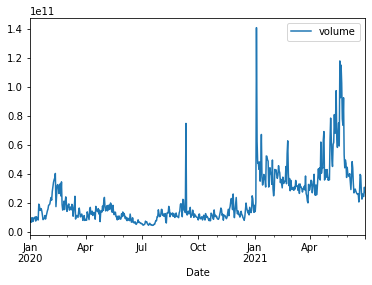

In [28]:
df.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.